# Introduction 

the dataset from kaggle from this link : https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset

# Import Libraries ...

In [20]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pickle
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')

# Load the data 

In [2]:
df=pd.read_csv('diabetes_prediction_dataset.csv')
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


## Some data cleaning
Although it is clean, there are some modifications ...

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [4]:
df['hypertension'].value_counts()

hypertension
0    92515
1     7485
Name: count, dtype: int64

In [5]:
df['smoking_history'].value_counts()

smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64

In [6]:
df['diabetes'].value_counts()

diabetes
0    91500
1     8500
Name: count, dtype: int64

 Map the values in both 'smoking_history' & 'gender' columns to numeric values


In [7]:
mapping_dict = {'No Info': 0, 'never': 1, 'former': 2, 'current': 3, 'not current': 2, 'ever': 1}
df['smoking_history'] = df['smoking_history'].map(mapping_dict)
df['smoking_history'].value_counts()

smoking_history
1    39099
0    35816
2    15799
3     9286
Name: count, dtype: int64

In [8]:
df['gender'] = df['gender'].astype('category')
df['gender'] = df['gender'].cat.codes
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,1,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,1,27.32,5.7,158,0
3,0,36.0,0,0,3,23.45,5.0,155,0
4,1,76.0,1,1,3,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,0,80.0,0,0,0,27.32,6.2,90,0
99996,0,2.0,0,0,0,17.37,6.5,100,0
99997,1,66.0,0,0,2,27.83,5.7,155,0
99998,0,24.0,0,0,1,35.42,4.0,100,0


### impressively clean :)

In [9]:
print(df.isnull().sum())


gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


# we're done cleaning it's time to visualize

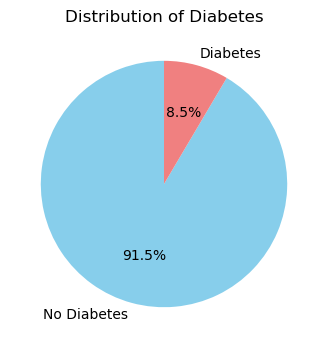

In [10]:
diabetes_counts = df['diabetes'].value_counts()

# Map labels
labels = {0: 'No Diabetes', 1: 'Diabetes'}
diabetes_counts.index = diabetes_counts.index.map(labels)

# Create a pie chart
plt.figure(figsize=(4, 4))
plt.pie(diabetes_counts, labels=diabetes_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Diabetes')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<AxesSubplot:xlabel='count', ylabel='HbA1c_level'>

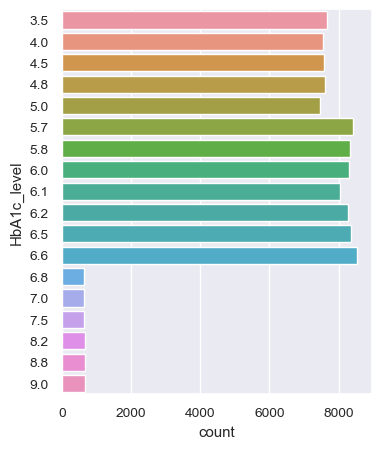

In [11]:
sns.set(rc={'figure.figsize':[4,5]},font_scale=0.9)

sns.countplot(y='HbA1c_level',data=df)

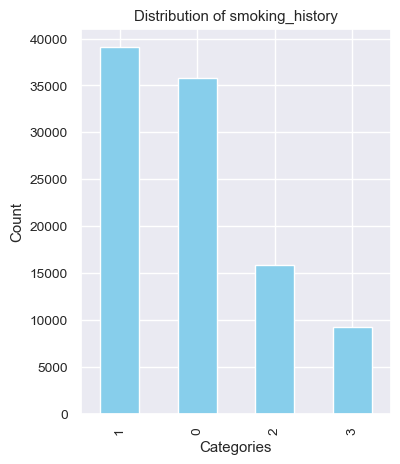

In [12]:
df['smoking_history'].value_counts().plot(kind='bar', color='skyblue')

# Adding labels and title
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title(f'Distribution of smoking_history')

# Display the plot
plt.show()

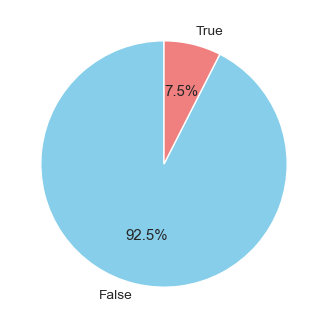

In [13]:
counts = df['hypertension'].value_counts()

# Map labels
labels = {0: 'False', 1: 'True'}
counts.index = counts.index.map(labels)

# Create a pie chart
plt.figure(figsize=(4, 4))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.show()

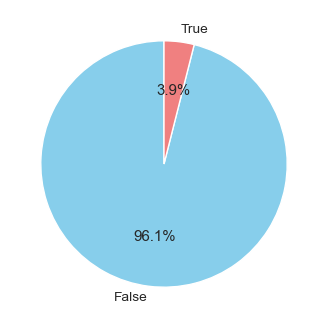

In [14]:
counts = df['heart_disease'].value_counts()

# Map labels
labels = {0: 'False', 1: 'True'}
counts.index = counts.index.map(labels)

# Create a pie chart
plt.figure(figsize=(4, 4))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.show()

### there's no corr between any column so there's nothing to do farther that that :/

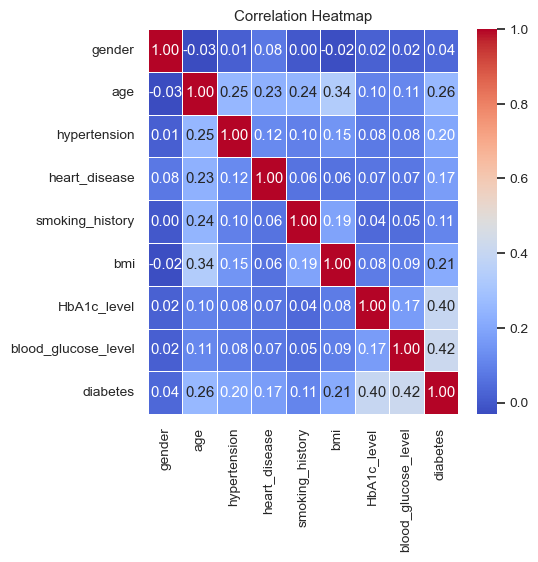

In [15]:

plt.figure(figsize=(5, 5))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()

# building ML models

we're using the first 9 columns as features and the last col is the target

In [29]:
x=df.iloc[:, 0:8].values
x

array([[  0.  ,  80.  ,   0.  , ...,  25.19,   6.6 , 140.  ],
       [  0.  ,  54.  ,   0.  , ...,  27.32,   6.6 ,  80.  ],
       [  1.  ,  28.  ,   0.  , ...,  27.32,   5.7 , 158.  ],
       ...,
       [  1.  ,  66.  ,   0.  , ...,  27.83,   5.7 , 155.  ],
       [  0.  ,  24.  ,   0.  , ...,  35.42,   4.  , 100.  ],
       [  0.  ,  57.  ,   0.  , ...,  22.43,   6.6 ,  90.  ]])

In [30]:
y=df['diabetes']
y

0        0
1        0
2        0
3        0
4        0
        ..
99995    0
99996    0
99997    0
99998    0
99999    0
Name: diabetes, Length: 100000, dtype: int64

## Random Forest model

In [28]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Hyperparameter tuning
rf_param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_gcv = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid, cv=3, n_jobs=-1)
rf_gcv.fit(X_train, y_train)

# Feature selection using the best Random Forest model
rf_selector = SelectFromModel(rf_gcv.best_estimator_)
rf_selector.fit(X_train, y_train)
X_train_selected = rf_selector.transform(X_train)
X_test_selected = rf_selector.transform(X_test)

# Train the model on the selected features
rf_gcv.best_estimator_.fit(X_train_selected, y_train)

# Make predictions and evaluate model
y_pred = rf_gcv.best_estimator_.predict(X_train_selected)
accuracy = accuracy_score(y_train, y_pred)
print("Training accuracy:", accuracy)

y_pred = rf_gcv.best_estimator_.predict(X_test_selected)
accuracy = accuracy_score(y_test, y_pred)
print("Testing accuracy:", accuracy)

Training accuracy: 0.9718
Testing accuracy: 0.97215


## Logistic Regression model

In [21]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming X and y are your feature matrix and target variable
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Hyperparameter tuning
logreg_param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2']
}

# Logistic Regression model
logreg_model = LogisticRegression(random_state=42)
logreg_gcv = GridSearchCV(estimator=logreg_model, param_grid=logreg_param_grid, cv=3, n_jobs=-1)
logreg_gcv.fit(X_train, y_train)

# Feature selection using the best Logistic Regression model
logreg_selector = SelectFromModel(logreg_gcv.best_estimator_)
logreg_selector.fit(X_train, y_train)
X_train_selected = logreg_selector.transform(X_train)
X_test_selected = logreg_selector.transform(X_test)

# Train the model on the selected features
logreg_gcv.best_estimator_.fit(X_train_selected, y_train)

# Make predictions and evaluate model
y_pred = logreg_gcv.best_estimator_.predict(X_train_selected)
accuracy = accuracy_score(y_train, y_pred)
print("Training accuracy:", accuracy)

y_pred = logreg_gcv.best_estimator_.predict(X_test_selected)
accuracy = accuracy_score(y_test, y_pred)
print("Testing accuracy:", accuracy)


Training accuracy: 0.9410875
Testing accuracy: 0.93895


## Decision Tree model

In [22]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming X and y are your feature matrix and target variable
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Hyperparameter tuning
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_gcv = GridSearchCV(estimator=dt_model, param_grid=dt_param_grid, cv=3, n_jobs=-1)
dt_gcv.fit(X_train, y_train)

# Feature selection using the best Decision Tree model
dt_selector = SelectFromModel(dt_gcv.best_estimator_)
dt_selector.fit(X_train, y_train)
X_train_selected = dt_selector.transform(X_train)
X_test_selected = dt_selector.transform(X_test)

# Train the model on the selected features
dt_gcv.best_estimator_.fit(X_train_selected, y_train)

# Make predictions and evaluate model
y_pred = dt_gcv.best_estimator_.predict(X_train_selected)
accuracy = accuracy_score(y_train, y_pred)
print("Training accuracy:", accuracy)

y_pred = dt_gcv.best_estimator_.predict(X_test_selected)
accuracy = accuracy_score(y_test, y_pred)
print("Testing accuracy:", accuracy)

Training accuracy: 0.9718
Testing accuracy: 0.97215


##  SVM model

In [23]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel

# Assuming "features" and "target" are your feature matrix and target variable
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Hyperparameter tuning with a reduced search space
svm_param_grid = {
    'C': [4],
    'kernel': ['linear'],
}

# SVM model
svm_model = SVC(random_state=42)
svm_gcv = GridSearchCV(estimator=svm_model, param_grid=svm_param_grid, cv=3, n_jobs=-1)
svm_gcv.fit(X_train_scaled, y_train)

# Feature selection using linear kernel SVM
svm_selector = SelectFromModel(svm_gcv.best_estimator_)
svm_selector.fit(X_train_scaled, y_train)

# Train the model on the selected features
X_train_selected = svm_selector.transform(X_train_scaled)
X_test_selected = svm_selector.transform(X_test_scaled)
svm_gcv.best_estimator_.fit(X_train_selected, y_train)

# Make predictions and evaluate model
y_pred = svm_gcv.best_estimator_.predict(X_train_selected)
accuracy = accuracy_score(y_train, y_pred)
print("Training accuracy:", accuracy)

y_pred = svm_gcv.best_estimator_.predict(X_test_selected)
accuracy = accuracy_score(y_test, y_pred)
print("Testing accuracy:", accuracy)

Training accuracy: 0.9597875
Testing accuracy: 0.9567


## Gaussian Naive Bayes model

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Assuming X and y are your feature matrix and target variable
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Standardize the data (optional, but can be useful)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Gaussian Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Make predictions and evaluate model
y_pred = nb_model.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
print("Training accuracy:", accuracy)

y_pred = nb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Testing accuracy:", accuracy)

Training accuracy: 0.90415
Testing accuracy: 0.90595


## KNN model

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Assuming X and y are your feature matrix and target variable
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Standardize the data (important for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors
knn_model.fit(X_train, y_train)

# Make predictions and evaluate model
y_pred = knn_model.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
print("Training accuracy:", accuracy)

y_pred = knn_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Testing accuracy:", accuracy)

Training accuracy: 0.96405
Testing accuracy: 0.9535


# Pipeline

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create a pipeline with three steps:
# 1. Standardize the features
# 2. Apply the specified classifier
pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(random_state=42))
])

pipeline_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(random_state=42))
])

pipeline_dt = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

pipeline_svm = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SVC(random_state=42))
])

pipeline_nb = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', GaussianNB())
])

pipeline_knn = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', KNeighborsClassifier())
])

# List of pipelines for easy iteration
pipelines = [pipeline_rf, pipeline_lr, pipeline_dt, pipeline_svm, pipeline_nb, pipeline_knn]

# Fit the pipelines and evaluate each model
for pipeline in pipelines:
    model_name = pipeline.named_steps['classifier'].__class__.__name__

    # Fit the model
    pipeline.fit(X_train, y_train)

    # Predict on the test set
    y_pred = pipeline.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy: {accuracy}")


RandomForestClassifier Accuracy: 0.97035
LogisticRegression Accuracy: 0.95915
DecisionTreeClassifier Accuracy: 0.9536
SVC Accuracy: 0.9623
GaussianNB Accuracy: 0.90595
KNeighborsClassifier Accuracy: 0.96115
